# 1. 과거를 기억하는 신경망: RNN (Recurrent Neural Network)

## 1-1. 순차(Sequence) 데이터란?

- 순차 데이터(Sequence Data)의 정의
    - 순서에 의미가 있으며, 순서가 달라질 경우 의미가 손상되는 데이터
- 순차 데이터의 예시
    1. 음성 및 오디어 데이터
    2. 자연어
    3. 생물학적 서열 데이터
    4. 비디어 데이터
- 기존 정형 데이터와의 차이점
    - 일반적인 정형 데이터의 특징 -> 순서 의미X
        - 샘플(행)의 독립성
        - 특성(열)의 독립성
    - 순차 데이터의 특징
        - 요소의 순서 의존성: 데이터를 구성하는 요소들의 순서 자체가 핵심 정보
        - 자기상관성: 이전 시점의 데이터가 다음 시점의 데이터에 영향을 미침
- 순차 데이터의 특징을 고려하기 위해서는 기존 머신러닝 기법으로는 한계가 있음
- 과거의 정보를 기억하고, 순서의 의미를 학습할 수 있는 특별한 신경망이 필요함

## 1-2. RNN의 구조와 원리
- RNN(Recurrent Neural Network)의 정의
    - 순환하는 구조를 가진, 순차 데이터 처리에 특화된 인공 신경망
    - '순환 신경망'
- 이것만 알면 RNN 마스터
    1. 시퀀스 데이터를 입력받아 순서 정보를 유지하며 처리한다.
    2. 순환하는 은닉층이 매 시점의 은닉 상태를 업데이트한다.
        - 은닉층: 신경망 구성요소, 규칙, 함수
        - 은닉상태: 특정 시점에 은닉층을 통과한 결과값, 메모리, 문맥
    3. 이전 시점의 값을 현재 시점으로 넘겨준다.
- RNN의 구조
    - 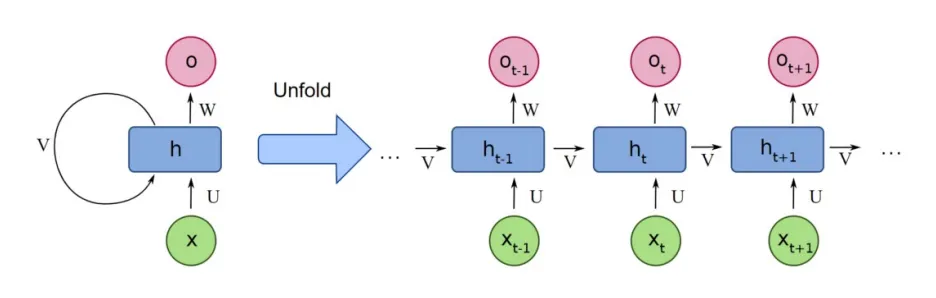
    - 초록색은 입력층, 파란색은 은닉층, 분홍색은 출력층을 의미한다.
    - 용어 설명    
        - $x_t$: 시간 스텝  $t$에서의 **입력 (Input)**
        - $h_t$: 시간 스텝  $t$에서의 **은닉 상태 (Hidden State)**. 이 시점의 '**메모리**'입니다.
        - $o_t$: 시간 스텝  $t$에서의 **출력 (Output)**
        - $U$(**입력 가중치**):
            - 현재 시점  $t$의 입력($x_t$)이 은닉 상태($h_t$)에 영향을 주는 가중치
            - **현재 정보**를 처리하는 역할
        - $V$(**순환 가중치**):
            - 이전 시점 $t-1$의 은닉 상태($h_{t-1}$)가 현재 은닉 상태에 영향을 주는 가중치
            - **과거 정보**를 **다음 시점으로 전달**하는 **핵심 역할**
        - $W$(**출력 가중치**):
            - 현재 시점 $t$의 은닉 상태($h_{t}$)가 최종 출력($o_t$)에 영향을 미치는 가중치
            - 계산된 메모리를 바탕으로 **결과**를 만들어내는 역할
    - 정보 흐름
        - **$t−1$  시점**: 입력 $x_{t-1}$이 들어가서 은닉 상태 $h_{t-1}$을 업데이트하고, 출력 $o_{t-1}$을 내보냅니다.
        - **$t$  시점**:  $t−1$ 시점에서 계산된 **은닉 상태 $h_{t-1}$이 다음 시점으로 그대로 전달**됩니다.
        - **새로운 입력** $xt$와 전달받은 **과거 정보** $h_{t-1}$을 함께 사용하여 **현재 시점의 은닉 상태** $ht$를 업데이트하고, **출력** $ot$를 계산합니다.
    - ⇒ 은닉 상태(Hidden State)의 순환을 통해 과거의 정보를 다음 시점으로 계속해서 전달

- RNN의 핵심 원리: 가중치 공유
    - 동일한 가중치를 시퀀스의 다양한 시점에서 반복적으로 적용
    - RNN이 시퀀스 데이터의 길이와 시점 위치에 상관없이 효과적으로 작동하게 하는 핵심 원리
    - 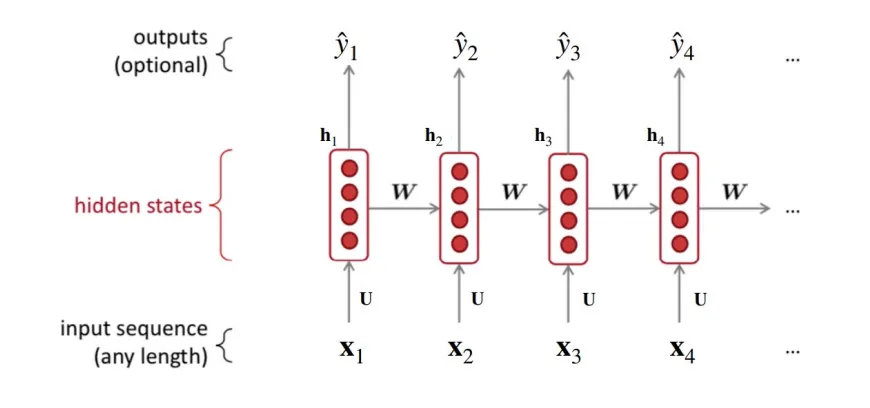
    - 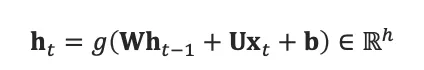
    - $X_1$을 처리할 때, $X_2$를 처리할 때, 그리고 $X_n$을 처리할 때까지 모두 동일한 파라미터(입력 가중치(U), 순환 가중치(W), 편향(b)) 를 공유하는 구조
    - 가중치 공유의 이점
        1. 학습 파라미터의 수 감소
        - 가중치 공유를 통해 RNN은 입력 시퀀스의 길이가 아무리 길어져도 학습해야 할 파라미터의 수가 일정하게 유지됨, 모델을 더 빠르고 가볍게 만듦
        2. 일반화 능력 향상
        - RNN은 이전 시점까지의 정보와 현재 시점의 입력이 주어졌을 때, 어떻게 상태(메모리)를 업데이트할 것인가? 라는 하나의 일반적 규칙을 학습
        - 훈련 데이터에 없던 새로운 길이의 시퀀스나 다양한 패턴에도 유연하게 대응이 가능함

## 1-3. RNN의 한계 및 장기 의존성 문제 (The Long-Term Dependency Problem)
### RNN의 한계점
- RNN 구조의 특성 상 전체 시퀀스를 모두 읽은 후 역전파가 이루어짐
    - 역전파를 구하는 과정에서 chain rule에 의해 다음 미분값이 반복적으로 곱해짐(등비수열 형태)
    - 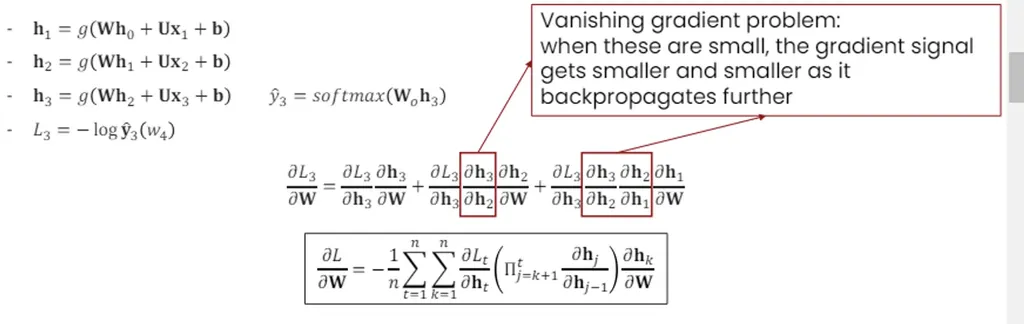
    - $$\frac{\partial h_t}{\partial h_{t-1}} = \underbrace{\text{diag}\left(g'(a_t)\right)}_{\text{활성화 함수 미분값}} \ \times\underbrace{W_{hh}}_{\text{순환 가중치}}$$
    - 활성화 함수 미분값 : 활성화 함수의 미분값을 대각행렬로 표현한 것
    - 순환 가중치 : 은닉상태에서 은닉상태로 정보가 전달될 때 사용되는 가중치
1. **기울기 소실 (Vanishing Gradients)**
    - 시퀀스 뒤쪽의 오차가 앞쪽까지 제대로 전달되지 않아 먼 과거의 정보를 학습하지 못하는 현상
    - 역전파 과정에서 반복적으로 곱해지는 **기울기(미분값)의 크기가 1보다 작을 때 ⇒ 기울기가 0으로 수렴**
    - 뒤로 갈수록 back propagation(역전파)할 때 기울기가 계속 작아져서, 앞쪽(초기)의 가중치는 거의 학습이 안 되는 현상. 즉, 중요한 과거 정보를 반영할 수 없게 된다
2. **기울기 폭주 (Exploding Gradients)**
    - 시퀀스 뒤쪽의 오차가 역전파 과정에서 비정상적으로 커지는 문제
    - 역전파 과정에서 반복적으로 곱해지는 **기울기(미분값)의 크기가 1보다 클 때 ⇒ 기울기가 무한대로 발산**
    - 엄청나게 커진 기울기 때문에 가중치가 터무니없이 큰 값으로 업데이트되어 모델이 간단한 패턴도 학습하지 못하고, 입력값에 대해 엉뚱한 예측을 하거나, 계산 불능(NaN, Infinity) 상태가 되는 것!
3. **느린 훈련 시간**
    - 계산 과정이 순차적으로 이루어져야만 하는 구조적 한계
    - $t$ 시점의 은닉 상태($h_t$)를 계산하려면 $t-1$ 시점의 은닉 상태($h_{t-1}$)가 먼저 계산되어야 한다.  
    ⇒ 이 의존성 때문에 전체 시퀀스를 한 번에 병렬 처리 불가능

### 장기 의존성 문제 (Long-Term Dependency Problem)
- 위 세가지 RNN의 구조적 한계는 장기 의존성 문제라는 하나의 치명적인 약점으로 이어짐
- 시퀀스 앞 부분의 중요한 정보를 잊어버려 맥락 파악 능력이 급격히 저하되는 현상
- 모델의 '단기 기억력'은 준수했지만, '장기기억력'에 문제 발생
- ⇒ 새로운 모델의 필요성 대두
    - RNN의 기억력 한계를 극복
    - 더 길고 복잡한 시퀀스 데이터를 안정적으로 다룰 수 있는 새로운 대안
    - 중요한 정보는 오래 기억하고, 불필요한 정보는 잊는 똑똑한 메모리 구조


# 2. 똑똑하게 기억하고 잊는 법: LSTM & GRU
## 2-0. <짱구는 못말려>로 알아보는 LSTM & GRU

1. 🧠 LSTM: '철수' (복잡하고 정교한 엘리트)  
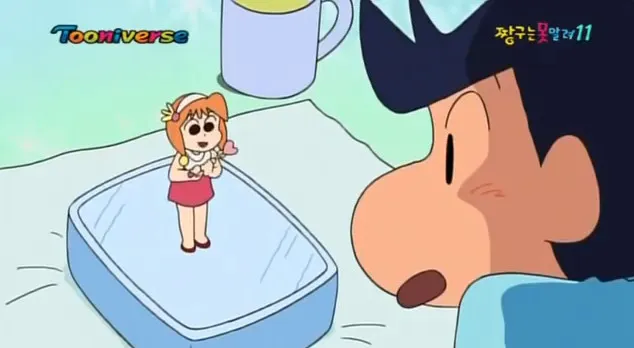  
- 철수는 겉으로는 엘리트, 속으로는 마법소녀 모에피를 사랑하는 두 개의 다른 상태를 가지고 있음
    - 마법소녀 모에피 (셀 상태 $C_t$ - 장기 기억): 이 기억은 절대 변하지 않는 핵심 기억
    - 엘리트 (은닉 상태 $h_t$ - 단기 기억/출력): 이 기억은 짱구와 친구들에게 당장 보여주는 겉모습(그러나 이 겉모습도 사실 속마음의 영향을 받아 결정됩니다…!)
- 철수(LSTM)의 행동 방식
    1. “이 기억은 잊자” (Forget Gate): 어제 짱구랑 엉덩이 춤 췄던 흑역사($C_{t-1}$)는 잊어버리자!
    2. “이건 기억하자” (Input Gate): 오늘 새로 나온 모에피 신상 피규어 정보($x_t$)는 핵심 기억($C_t$)에 저장하자.
    3. “이렇게 행동하자!” (Output Gate): 모에피를 좋아하는 속마음($C_t$)은 바탕에 깔려 있고, 겉으로는 태연하게 ‘신짱구 너 왜 그러냐?’라고 말하자($h_t$).
- 결론적으로 **LSTM(철수)은 진짜 속마음과 겉모습을 따로 분리해서 관리**합니다. 매우 정교하지만 그만큼 고민이 많고 복잡하다는 특징이 있습니다.

2. ⚡ GRU: '짱구' (단순하고 반응속도 빠른 천재)  
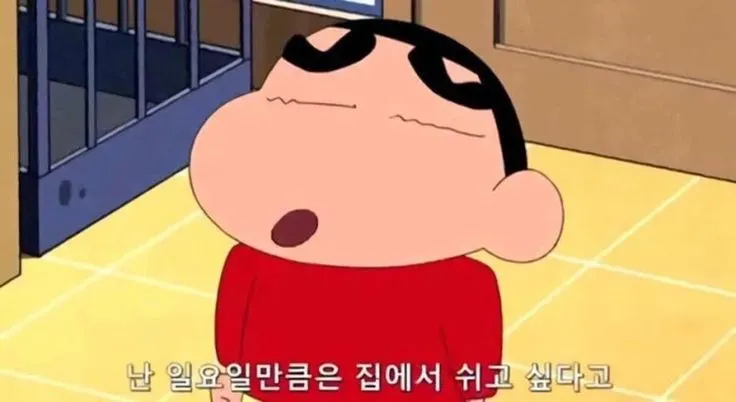  
- 짱구는 속마음과 겉모습이 다르지 않고, 모든 기억과 행동이 짱구라는 하나의 상태($h_t$)로 통합됨. 초코비, 액션가면, 예쁜 누나 등 모든 기억이 하나로 뭉쳐 있음.
- 과거 기억 vs 새 정보, 몇 대 몇? (Update Gate)
    - 짱구는 과거 경험과 새로운 자극을 비율로 섞어서 행동함.
    - 엄마한테 혼났던 기억($h_{t-1}$)이 30% 있어도, 눈앞에 예쁜 누나($x_t$)가 나타난 기억이 70% 더 중요함. → “예쁜 누나, 어디 가요?”
- 과거 기억은 얼마나 무시해야 할까? (Reset Gate)
    - 새로운 자극이 강렬하면, 과거 기억은 잠시 무시함.
    - 방금 엄마한테 혼났지만($h_{t-1}$), 액션가면($x_t$)이 시작하네! → TV 앞으로 간다.
- 결론적으로 GRU(짱구)는 기억과 행동이 하나로 통합됨. LSTM(철수)보다 훨씬 단순하고 즉각적인 반응임. 웬만한 상황에서는 짱구의 단순한 방식이 효율적이지만, LSTM(철수)에 비해 정교함은 당연히 떨어짐!

- 🐵 물론 둘 중 어느 모델을 사용할지는 실험을 통해 비교해 보아야 함.
---
## 2-1. 게이트(Gate)로 정보의 흐름을 제어하다: LSTM
### LSTM (Long Short Term Memory)
- 앞의 정보가 뒤로 충분히 전달되지 못하는 RNN의 기울기 소실 문제를 해결하기 위한 모델 구조
- 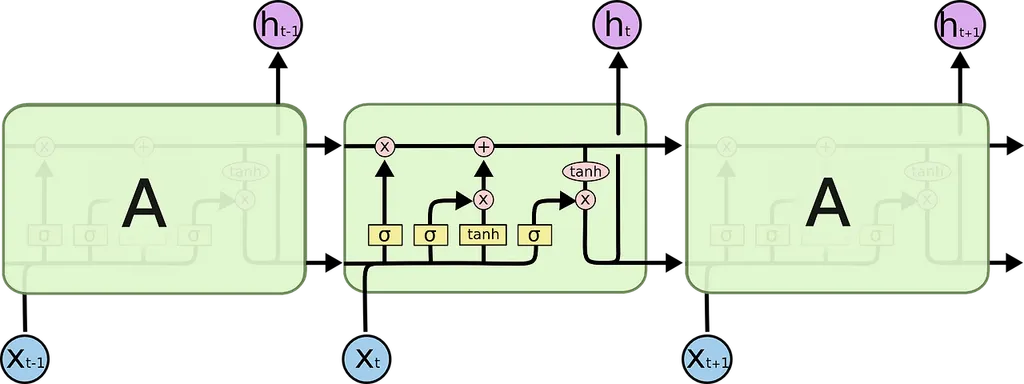
- 이것만 알면 LSTM 마스터
1. 핵심 아이디어: 기억할 내용과 잊어버릴 내용을 선택해서, 중요한 정보들을 오래 가져간다. → “GATE”를 통해 곱셈을 덧셈으로 바꾼다.
2. RNN과의 주요 차이: ct와 ht의 2개의 순환되는 층을 사용함.(RNN에서는 ht 1개)
    - ct(cell state): 장기 기억
    - ht(hidden state): 단기 기억
3. Gate를 통해 필요한 정보들만 통과
    - Forget gate: 정보를 얼마나 잊어버릴지 결정
    - Input gate: 현재 정보를 얼마나 사용할지 결정
    - Output gate: 다음 층으로 어떤 정보를 전달할지 결정(hidden state를 만듦)
4. Final memory cell: Input, forget gate를 결합해 현재 정보를 얼마나 기억할지 계산
- 🌟 LSTM의 장점 & 단점
    - 장점: Vanishing gradient problem 효과적으로 완화 (not 해결)
    - Gate를 통해 기억할 정보와 잊을 정보를 나눠서 관리함으로써, 이전의 정보가 중요하게 판단된다면, 완전히 보존되는 상태로 hidden state를 갱신해나갈 수 있기 때문
    - 단점: (많이) 복잡한 구조, RNN보다 학습 파라미터가 많아짐

## 2-2. 더 단순하고 효율적인 구조: GRU (Gated Recurrent Unit)
- LSTM에서 조금 더 발전한 것으로 별도의 메모리 셀 없이 게이트 수를 줄여 구조를 간소화!
- 이것만 알면 GRU 마스터 - LSTM과의 차이점
    - Forget gate와 input gate를 update gate 하나로 합침.
    - Reset gate를 사용함.
    - Gate의 개수가 3개에서 2개로 줄어 학습 시간이 줄어듦.(성능은 LSTM보다 유사 or 더 좋음)
- 🌟 GRU의 장점 & 단점
    - 장점: 성능과 효율성 사이의 균형이 좋음.
    - 단점: 긴 시퀀스 처리에서의 한계는 여전히 존재함.
---
## 2-3. LSTM vs GRU: 언제 무엇을 선택할까?
- 상황에 맞는 선택이 중요함!
- **LSTM vs GRU 비교분석표**

| 구분 | LSTM | GRU |
| --- | --- | --- |
| **구조** | 3개 게이트 (입력, 삭제, 출력) | 2개 게이트 (업데이트, 리셋) |
| **복잡도** | 더 복잡, 파라미터 수 많음 | 단순, 파라미터 수 적음 |
| **학습 속도** | 느림 (계산량 많음) | 빠름 (계산량 적음) |
| **메모리 사용량** | 큼 | 작음 |
| **장기 의존성 처리** | 더 강력 | LSTM과 비교해 다소 약함 |
| **연구/사례 축적** | 매우 많음 | 비교적 적음 (최근 등장) |
| **성능** | 데이터가 충분하고 문제 복잡성이 높을 때 강력 | 데이터가 적거나 효율성이 중요할 때 유리 |

- LSTM이 적합한 경우
    - 긴 시퀀스에서 문맥 이해가 중요한 작업
    - 데이터 양이 충분하고 복잡한 패턴을 학습해야 하는 경우
    - 모델 성능이 계산 효율보다 더 중요한 경우
    - 기계 번역, 언어 모델링, 장기 시계열 예측 (예: 금융, 기후 데이터)
- GRU가 적합한 경우
    - 자원이 제한적이거나 학습 속도가 중요한 경우
    - 데이터 양이 적고 과적합 위험이 있는 경우
    - 실시간 예측이 필요한 응용
    - 사용 예시: 음성 인식, 스트리밍 데이터, 실시간 비디오 분석, 짧은 시퀀스 기반의 텍스트 분류

- 실험을 통해 두 모델을 비교한 후 선택하는 것이 일반적


# 3. 문장을 입력받아 문장을 출력하다: Seq2Seq
## 3-0. <짱구는 못말려>로 알아보는 Seq2Seq
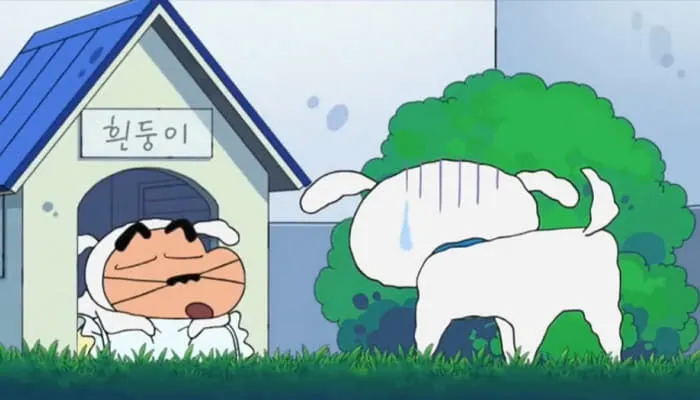  
- Seq2Seq는 짱구가 흰둥이에게 솜사탕 장기자랑을 시키는 것과 흡사함!
- Seq2Seq는 크게
    1. 인코더(Encoder):말하는 애 = 짱구
    2. 디코더(Decoder):듣고 행동하는 애 = 흰둥이  
    로 나뉠 수 있음.

- **말하는 애, 인코더! = 짱구**
    - 짱구가 입력 문장(Sequence)를 받아서 그 의미를 하나의 핵심 요약으로 압축함.
    - 짱구가 흰둥이에게 횡설수설 명령을 내림.
        - 입력(Input Sequence): 흰둥아~ 있잖아~ 그거~ 동그란 거~ 솜사탕~
    - 인코더는 이 5개의 단어를 순서대로 다 듣고 '솜사탕 장기자랑 시키기'라는 하나의 핵심 의도로 요약함.
        - 여기서 핵심 의도 = 컨텍스트 벡터(Context vector)  
        = 짱구가 흰둥이에게 넘겨주는 유일한 정보
- **듣고 행동하는 애, 디코더! = 흰둥이**
    - 인코더가 압축한 컨텍스트 벡터(context vector)를 받아서, 새로운 문장이나 행동(Sequence)를 만들어냄.
    - 흰둥이는 짱구의 컨텍스트 벡터를 전달받음.
        - 출력(Output Sequence): 몸을 던져서 -> 데굴데굴 구르고 -> 털을 부풀려서 -> 뿅 하는 포즈를 잡기
- **Seq2Seq의 핵심적인 특징은?**
    1. 입력과 출력의 길이가 달라도 된다!
        - 짱구가 '흰둥아, 솜사탕'이라고 짧게 말해도 흰둥이는 <웅크리고 -> 구르고 -> 부풀리고 -> 포즈>라는 긴 행동으로 보답
        - 이는 번역, 챗봇 요약에 특화된 기능
    2. 인코더와 디코더가 분리되어 있다!
        - 명령을 내리고 의미를 요약하는 인코더와 요약된 의미를 바탕으로 새로운 문맥을 만들어내는 디코더의 역할로 나뉨.
    3. 문맥 벡터라는 다리를 건넌다!
        - 짱구가 아무리 횡설수설 말해도 흰둥이는 짱구의 컨텍스트 벡터만 알잘딱깔센 진행함

## 3-1. Seq2Seq의 기본 구조: 인코더와 디코더

### Seq2Seq
- 한 시퀀스를 다른 시퀀스로 변환하는 작업을 수행하는 딥러닝 모델로, 대표적으로 기계번역에서 사용됨.
- 특징 1: 아이템(단어)의 입력 개수와 출력 개수가 같지 않아도 됨.
- 특징 2: 인코더와 디코더라는 모듈을 가지고 있어, Encoder-Decoder 모델이라고도 불림.

### 인코더와 디코더란?
- 🙋‍♂️ 우리가 “I am a student”를 프랑스어 “je suis étudiant”로 번역한다고 가정!
- 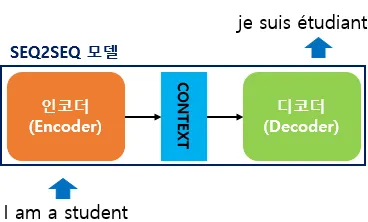
- 인코더 (Encoder)
    - 입력된 시퀀스를 읽고 압축하여 디코더에게 넘겨줄 문맥 정보 준비(원문의 특징 파악)
    - 여기서 압축된 정보는 컨텍스트 벡터(context vector)라고 함.(요약 정보)
    - 인코더에서는 t 시점의 임베딩된 단어의 입력과 t-1 시점의 은닉 상태(hidden state)가 RNN/LSTM의 입력으로 주어지며, 그 결과로 t시점의 은닉 상태가 나옴.
- 디코더 (Decoder)
    - 압축된 정보를 바탕으로 원하는 시퀀스를 생성.(번역문 생성)
    - 기본적인 seq2seq에서는, 인코더가 보내준 컨텍스트 벡터는 디코더의 첫번째 은닉 상태에 사용됨.
    - t시점에 나온 출력값이 그 다음 시점의 입력값으로 넘어감.
- 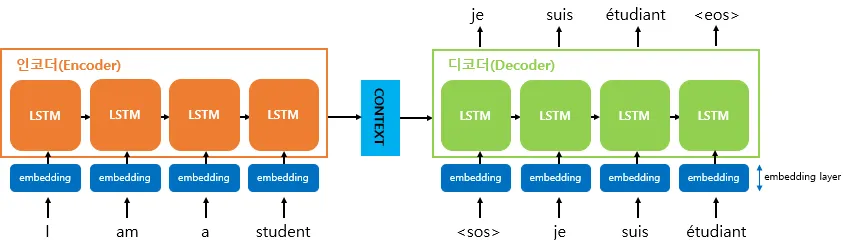
- 인코더와 디코더 모두 그림과 같이 RNN(or LSTM/GRU)를 여러개 조합한 형태임.
- 모든 단어는 워드 임베딩(word2vec) 과정을 거침.

- 컨텍스트 벡터 (Context Vector)
    - 컨텍스트 벡터는 float형의 벡터 형태이며, 인코더 중 마지막 시점의 은닉 상태(hidden state)를 의미함.
    - 입력 시퀀스(입력된 문장)의 요약 정보처럼 작동.
    - 벡터의 차원은 직접 설정할 수 있다. 위의 그림에서는 4차원이지만 실제로 사용할 때는 256, 512, 1024 차원으로 설정한다.
---
- 마지막으로 전체 과정 한번에 보기!  
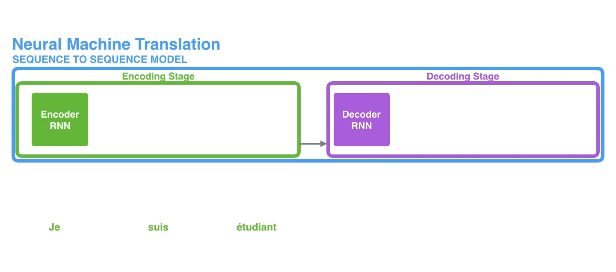  
- $t$시점의 단어와 $t-1$ 시점의 단어를 기억하며 정보를 쌓아가고, 마지막 단어가 입력된 다음에 생성된 은닉 상태(h)가 context vector임. 이렇게 생긴 context vector를 입력 문장에 대한 요약본으로 Decoder에 전달함.

## 3-2. Seq2Seq의 한계: 병목 현상 (Bottleneck)
- Seq2Seq는 LSTM의 동일한 입출력 크기 제약을 해결했지만 여전히 한계가 남아있음.
- 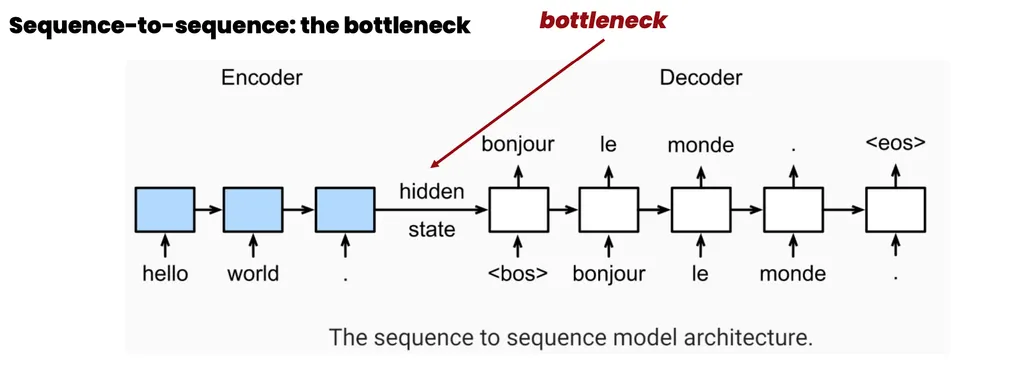
- “2025년 봄이었다. 그날은 5월 치고는 너무 더운 날씨였다. 수업을 마치고 집으로 향하던 길. 무슨 바람이 불었던 걸까, 갑자기 먹지도 않던 사과가 먹고 싶어졌다. 곧장 집 앞 마트로 향했고 사과를 3개 샀다. 사자마자 바로 한 입 베어 물었더니 아삭한 식감과 함께 만감이 교차했다” -> “나는 사과를 먹는다” 
- 이렇게 길이가 다른 두 문장에 대해서, 문장을 요약할 수 있는 요약본의 크기를 “단어 3개만 사용하세요”라고 제한을 걸어 버리면, 두 번째 문장에 대해서는 “시점”, “필자가 평소에 사과를 좋아하는지” “필자가 사과를 몇 개 샀는지”, … 등에 대한 모든 정보가 다 손실됨.
- 즉, 고정된 Context Vector에 소스 문장의 정보 압축 → 병목 현상 발생!!
    - 고정된 길이에 입력 시퀸스의 모든 정보를 담지 못하고 손실될 수 있음.
    - 특히 긴 입력 시퀸스의 경우 정보 손실이 더 심각하며, 이는 모델 성능 하락으로 이어짐.

- → 이러한 한계를 해결하기 위해 다음 세션에서 배울 Attention 매커니즘이 도입된다!!


# 세 줄 요약
1. RNN은 순차 데이터를 처리하기 위해 과거의 정보를 기억하지만, 정보가 길어질수록 앞의 내용을 잊어버리는 장기 의존성 문제가 있다!
2. LSTM과 GRU는 RNN의 한계 극복의 위해 등장했으며, Gate를 사용하여 필요한 정보는 오래 기억하고, 불필요한 정보는 잊어버리는 선택적 기억을 수행한다!
3. Seq2Seq는 문장을 입력받아 문장을 출력하는 인코더-디코더 구조로, 긴 문장의 모든 정보를 하나의 컨텍스트 벡터로 압축할 때 정보가 손실되는 병목 현상이 발생하기도 한다(ㅜㅜ).